<a href="https://colab.research.google.com/github/kevin-weis/Fake_News_Classification/blob/main/fakenews_deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fake_news_train.csv")
df = df.fillna(" ")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
train_data = df.set_index('id', drop=True)
train_data.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_data.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
length = []
[length.append(len(str(text))) for text in train_data['text']]
train_data['length'] = length
train_data.head()

,title,author,text,label,length
id,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [ ]:
min(train_data['length']), max(train_data['length']), round(sum(train_data['length'])/len(train_data['length']))

(1, 142961, 4544)

In [ ]:
len(train_data[train_data['length'] < 50])

246

In [ ]:
train_data['text'][train_data['length'] < 50]

id
82                                                   
142                                                  
169                                                  
173                                   Guest   Guest  
196            They got the heater turned up on high.
                             ...                     
20350                         I hope nobody got hurt!
20418                                 Guest   Guest  
20431    \nOctober 28, 2016 The Mothers by stclair by
20513                                                
20636                              Trump all the way!
Name: text, Length: 246, dtype: object

In [ ]:
train_data = train_data.drop(train_data['text'][train_data['length'] < 50].index, axis=0)
min(train_data['length']), max(train_data['length']), round(sum(train_data['length'])/len(train_data['length']))

(50, 142961, 4598)

In [ ]:
max_features = 4500
tokenizer = Tokenizer(num_words = max_features, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower = True, split = ' ')
tokenizer.fit_on_texts(texts = train_data['text'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
print(vocab_size)

238036


In [ ]:
X = tokenizer.texts_to_sequences(texts = train_data['text'])
X = pad_sequences(X, maxlen = max_features, padding='pre')

print(X.shape)
y = train_data['label'].values
print(y.shape)

(20554, 4500)
(20554,)


In [ ]:
# splitting the data training data for training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    shuffle=True)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),                         
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         540000    
_________________________________________________________________
dense (Dense)                (None, None, 512)         61952     
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 512)         262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 512)         262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 512)         0

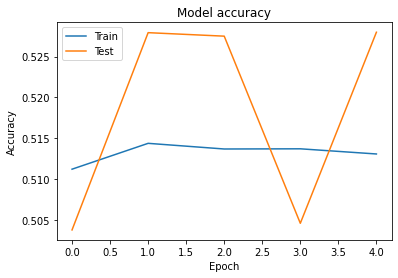

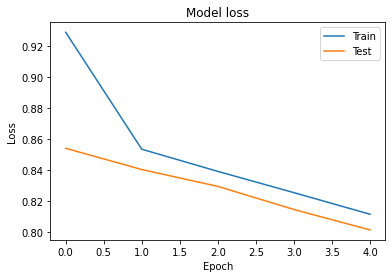

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(128, 4, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPool1D(pool_size=4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 4, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPool1D(pool_size=4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(32, 4, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPool1D(pool_size=4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 120)         540000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 120)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         61568     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          32832     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 64)         

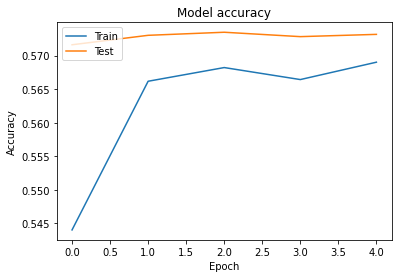

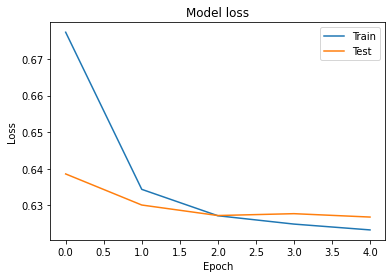

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 120)         540000    
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 120)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 64)          38464     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 20)          6800      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)               

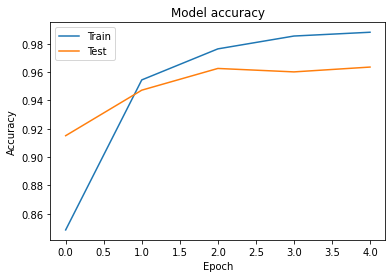

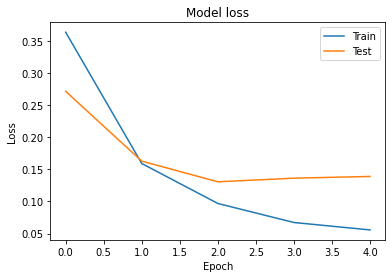

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 120)         540000    
_________________________________________________________________
dropout_16 (Dropout)         (None, None, 120)         0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 64)          38464     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 200)         132000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dropout_17 (Dropout)         (None, 200)              

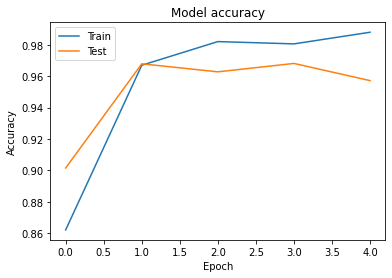

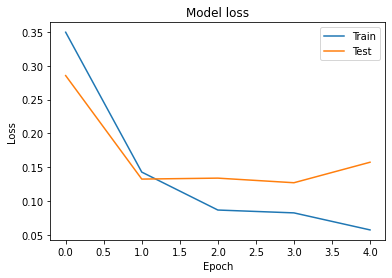

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
print('Evaluate')
result = model.evaluate(x=X_test, y=y_test)
print(result)

Evaluate
129/129 [==============================] - 12s 91ms/step - loss: 0.1575 - accuracy: 0.9572
[0.1574774980545044, 0.9571880102157593]
